<a href="https://colab.research.google.com/github/VaideswarReddy/Demanad-prediction-for-public-transport/blob/main/Vaideswar_Reddy_Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [70]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/Data _ Resources/train_revised.csv')

In [71]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [72]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [73]:
# df['travel_time'] = pd.to_datetime(df['travel_time'], format='%H:%M')

In [74]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [75]:
df.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [77]:
df.shape

(51645, 10)

In [78]:
df.payment_method.value_counts()

Mpesa    51532
Cash       113
Name: payment_method, dtype: int64

In [79]:
df.ride_id.value_counts()

8454     50
8090     49
10834    49
11382    49
13211    49
         ..
5804      1
9834      1
9738      1
11755     1
6147      1
Name: ride_id, Length: 6249, dtype: int64

In [80]:
df.seat_number.value_counts()

1      2065
8      1818
10     1789
2      1784
7      1782
       ... 
25      511
23B     508
1A      273
2A      173
14        1
Name: seat_number, Length: 61, dtype: int64

In [94]:
df.travel_from.value_counts()

Kisii        22607
Migori        7027
Homa Bay      6304
Sirare        4449
Rongo         3928
Kehancha      1909
Awendo        1788
Kijauri       1031
Keroka         988
Nyachenge      512
Rodi           405
Mbita          378
Ndhiwa         236
Sori            55
Keumbu          22
Oyugis           5
Kendu Bay        1
Name: travel_from, dtype: int64

In [81]:
df.groupby(['car_type','seat_number'])['seat_number'].value_counts()

car_type  seat_number  seat_number
Bus       10A          10A             681
          10B          10B             590
          11A          11A             774
          11B          11B             544
          12A          12A             716
                                      ... 
shuttle   5            5              1762
          6            6              1776
          7            7              1781
          8            8              1817
          9            9              1759
Name: seat_number, Length: 64, dtype: int64

In [82]:
df.groupby(['car_type','travel_time'])['travel_time'].value_counts()

car_type  travel_time  travel_time
Bus       19:03        19:03           334
          19:04        19:04           402
          19:05        19:05           207
          19:06        19:06           199
          19:07        19:07          3227
                                      ... 
shuttle   9:10         9:10            646
          9:20         9:20            660
          9:30         9:30            630
          9:40         9:40            589
          9:50         9:50            520
Name: travel_time, Length: 85, dtype: int64

In [83]:
df.groupby(['car_type','travel_time'])['car_type'].value_counts()

car_type  travel_time  car_type
Bus       19:03        Bus          334
          19:04        Bus          402
          19:05        Bus          207
          19:06        Bus          199
          19:07        Bus         3227
                                   ... 
shuttle   9:10         shuttle      646
          9:20         shuttle      660
          9:30         shuttle      630
          9:40         shuttle      589
          9:50         shuttle      520
Name: car_type, Length: 85, dtype: int64

In [84]:
df.groupby(['car_type','travel_date'])['car_type'].value_counts()

car_type  travel_date  car_type
Bus       01-01-18     Bus          52
          01-02-18     Bus         221
          01-03-18     Bus         248
          01-04-18     Bus         248
          01-12-17     Bus          21
                                  ... 
shuttle   30-11-17     shuttle      74
          30-12-17     shuttle      10
          31-01-18     shuttle     170
          31-03-18     shuttle      18
          31-12-17     shuttle       5
Name: car_type, Length: 292, dtype: int64

In [85]:
df.ride_id.value_counts()

8454     50
8090     49
10834    49
11382    49
13211    49
         ..
5804      1
9834      1
9738      1
11755     1
6147      1
Name: ride_id, Length: 6249, dtype: int64

In [86]:
df.dtypes

ride_id             int64
seat_number        object
payment_method     object
payment_receipt    object
travel_date        object
travel_time        object
travel_from        object
travel_to          object
car_type           object
max_capacity        int64
dtype: object

In [87]:
df.car_type.value_counts()

Bus        31985
shuttle    19660
Name: car_type, dtype: int64

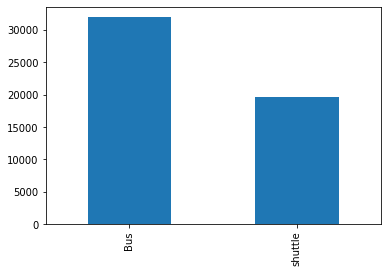

In [88]:
df.car_type.value_counts().plot.bar()

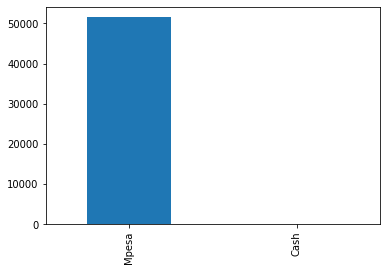

In [89]:
df.payment_method.value_counts().plot.bar()

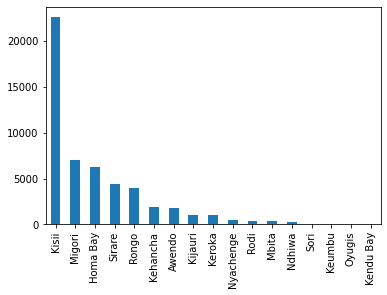

In [95]:
df.travel_from.value_counts().plot.bar()

In [90]:
df['travel_time'] = pd.to_datetime(df['travel_time'], format='%H:%M')

In [91]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,1900-01-01 07:15:00,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,1900-01-01 07:12:00,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,1900-01-01 07:05:00,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,1900-01-01 07:10:00,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,1900-01-01 07:12:00,Migori,Nairobi,Bus,49
